In [1]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from IPython.display import Image
import pydotplus
df = pd.read_csv('Liver.csv', header = 0,sep =',')
df.head(4)


,Cirrhosis,Diagnosis Age,Disease Free (Months),Disease Free Status,Mutation Count,Neoplasm Histologic Grade,Overall Survival Status,Overall Survival (Months),Tumor Other Histologic Subtype
0,4,44,86.9,DiseaseFree,62,I,Living,88.9,NBNC
1,3,59,38.1,Recurred,115,II,Living,88.9,NBNC
2,2,41,83.5,DiseaseFree,55,IIII,Living,88.1,HBV
3,2,44,10.3,Recurred,75,III,Deceased,58.2,NBNC


In [2]:
hp = {'Neoplasm Histologic Grade': {'I': 1, 'II': 2, 'III': 3, 'IIII': 4}}
df = df.replace(hp)

df

,Cirrhosis,Diagnosis Age,Disease Free (Months),Disease Free Status,Mutation Count,Neoplasm Histologic Grade,Overall Survival Status,Overall Survival (Months),Tumor Other Histologic Subtype
0,4,44,86.9,DiseaseFree,62,1,Living,88.9,NBNC
1,3,59,38.1,Recurred,115,2,Living,88.9,NBNC
2,2,41,83.5,DiseaseFree,55,4,Living,88.1,HBV
3,2,44,10.3,Recurred,75,3,Deceased,58.2,NBNC
4,4,56,26.1,Recurred,44,4,Deceased,43.1,HCV
...,...,...,...,...,...,...,...,...,...
226,2,61,19.9,DiseaseFree,205,2,Living,20.5,HBV
227,3,61,16.7,DiseaseFree,1014,3,Living,20.3,HCV
228,4,62,5.6,Recurred,97,3,Living,20.2,HBV
229,4,51,18.4,DiseaseFree,52,3,Living,20.0,HBV


In [3]:

df['Neoplasm Histologic Grade'] = pd.to_numeric(df['Neoplasm Histologic Grade'], errors='coerce')

df['Neoplasm Histologic Grade'] = df['Neoplasm Histologic Grade'].astype('Int64')
df.dtypes
df.isna().sum()

Cirrhosis                          0
Diagnosis Age                      0
Disease Free (Months)              0
Disease Free Status                0
Mutation Count                     0
Neoplasm Histologic Grade         19
Overall Survival Status            0
Overall Survival (Months)          0
Tumor Other Histologic Subtype     0
dtype: int64

In [4]:
# Quitar los valores nulos
df = df.dropna()

# Mostrar las primeras 4 filas después de quitar los nulos
print("\nDataFrame después de quitar los nulos:")
print(df.head(4))


DataFrame después de quitar los nulos:
   Cirrhosis  Diagnosis Age  Disease Free (Months) Disease Free Status  \
0          4             44                   86.9         DiseaseFree   
1          3             59                   38.1            Recurred   
2          2             41                   83.5         DiseaseFree   
3          2             44                   10.3            Recurred   

   Mutation Count  Neoplasm Histologic Grade Overall Survival Status  \
0              62                          1                  Living   
1             115                          2                  Living   
2              55                          4                  Living   
3              75                          3                Deceased   

   Overall Survival (Months) Tumor Other Histologic Subtype  
0                       88.9                           NBNC  
1                       88.9                           NBNC  
2                       88.1              

In [5]:
df.isna().sum()

Cirrhosis                         0
Diagnosis Age                     0
Disease Free (Months)             0
Disease Free Status               0
Mutation Count                    0
Neoplasm Histologic Grade         0
Overall Survival Status           0
Overall Survival (Months)         0
Tumor Other Histologic Subtype    0
dtype: int64

In [6]:
features=['Cirrhosis','Diagnosis Age','Disease Free (Months)','Disease Free Status','Mutation Count','Neoplasm Histologic Grade','Overall Survival (Months)','Tumor Other Histologic Subtype']

label='Overall Survival Status'

In [7]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split

from sklearn.metrics import recall_score, accuracy_score, f1_score, confusion_matrix,classification_report
import seaborn as asns

le=LabelEncoder()
sobrevive=le
y=sobrevive.fit_transform(df[label])
df['Disease Free Status']=le.fit_transform(df['Disease Free Status'])
df['Neoplasm Histologic Grade']=le.fit_transform(df['Neoplasm Histologic Grade'])
df['Tumor Other Histologic Subtype']=le.fit_transform(df['Tumor Other Histologic Subtype'])

/tmp/ipykernel_81322/1701591188.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Disease Free Status']=le.fit_transform(df['Disease Free Status'])
/tmp/ipykernel_81322/1701591188.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neoplasm Histologic Grade']=le.fit_transform(df['Neoplasm Histologic Grade'])
/tmp/ipykernel_81322/1701591188.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [8]:
df

,Cirrhosis,Diagnosis Age,Disease Free (Months),Disease Free Status,Mutation Count,Neoplasm Histologic Grade,Overall Survival Status,Overall Survival (Months),Tumor Other Histologic Subtype
0,4,44,86.9,0,62,0,Living,88.9,2
1,3,59,38.1,1,115,1,Living,88.9,2
2,2,41,83.5,0,55,3,Living,88.1,0
3,2,44,10.3,1,75,2,Deceased,58.2,2
4,4,56,26.1,1,44,3,Deceased,43.1,1
...,...,...,...,...,...,...,...,...,...
226,2,61,19.9,0,205,1,Living,20.5,0
227,3,61,16.7,0,1014,2,Living,20.3,1
228,4,62,5.6,1,97,2,Living,20.2,0
229,4,51,18.4,0,52,2,Living,20.0,0


In [9]:
xtrain, xtest,ytrain, ytest = train_test_split(df[features],y,test_size=0.20, random_state=0)
print('xtrain.shape' )
print(xtrain.shape)

print('len(ytrain)')
print(len(ytrain))

print('xtest.shape ')
print(xtest.shape)

print('len(ytest)')
print(len(ytest))

xtrain.shape
(169, 8)
len(ytrain)
169
xtest.shape 
(43, 8)
len(ytest)
43


In [10]:
df['Overall Survival Status'].value_counts()

Overall Survival Status
Living      176
Deceased     36
Name: count, dtype: int64

In [11]:
svm = SVC (probability=True)
modelo = svm.fit(xtrain,ytrain)
prediccion = modelo.predict(xtest)
prediccion_lista=prediccion.tolist()
ytest_lista = ytest.tolist()

i = 0

for pred in prediccion_lista:
  print(f"{pred} -> {ytest[i]}")
  i+=1
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ', recall_score(prediccion,ytest, average='micro'))

print('f1_score: ', f1_score(prediccion,ytest,  average='micro'))

print('classification_report=', classification_report(prediccion, ytest))

/home/daarcy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 0
1 -> 0
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 1
score:  0.8372093023255814
recall_score:  0.8372093023255814
f1_score:  0.8372093023255814
classification_report=               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.84      0.91        43

    accuracy                           0.84        43
   macro avg       0.50      0.42      0.46        43
weighted avg       1.00      0.84      0.91        43



/home/daarcy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daarcy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
data = {'Cirrhosis': 2, 'Diagnosis Age': 61, 'Disease Free (Months)': 10.3, 'Disease Free Status': 0, 'Mutation Count': 44, 'Neoplasm Histologic Grade':1,'Overall Survival (Months)':43.1,'Tumor Other Histologic Subtype':2}

pp =pd.DataFrame(data, index=[0])
pre_pp= modelo.predict(pp)
print(pp)
sobrevive.inverse_transform(pre_pp.tolist())[0]

   Cirrhosis  Diagnosis Age  Disease Free (Months)  Disease Free Status  \
0          2             61                   10.3                    0   

   Mutation Count  Neoplasm Histologic Grade  Overall Survival (Months)  \
0              44                          1                       43.1   

   Tumor Other Histologic Subtype  
0                               2  


'HCV'

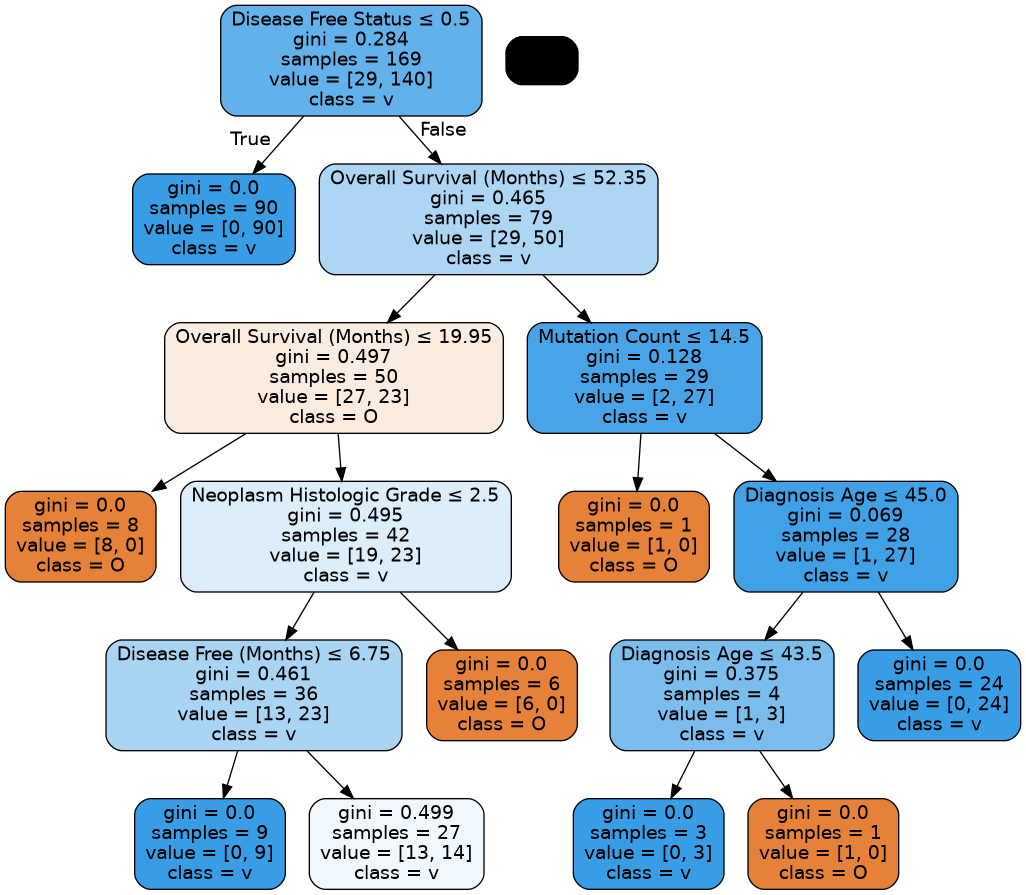

In [13]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from IPython.display import Image
import pydotplus
svm = DecisionTreeClassifier (max_depth=5)
modelo = svm.fit(xtrain,ytrain)
prediccion = modelo.predict(xtest)
dot_data = export_graphviz(modelo, out_file=None,
                           feature_names=features,
                           class_names= label,
                           filled=True,rounded=True,
                           special_characters=True)


graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [14]:
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ', recall_score(prediccion,ytest, average='micro'))

print('f1_score: ', f1_score(prediccion,ytest,  average='micro'))

print('classification_report=', classification_report(prediccion, ytest))


score:  0.8604651162790697
recall_score:  0.8604651162790697
f1_score:  0.8604651162790697
classification_report=               precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.94      0.89      0.92        38

    accuracy                           0.86        43
   macro avg       0.69      0.75      0.71        43
weighted avg       0.88      0.86      0.87        43



In [19]:
from sklearn.ensemble import GradientBoostingClassifier
svm = GradientBoostingClassifier ()
modelo = svm.fit(xtrain,ytrain)
prediccion = modelo.predict(xtest)
dump(modelo, 'modelo.joblib')
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ', recall_score(prediccion,ytest, average='micro'))

print('f1_score: ', f1_score(prediccion,ytest,  average='micro'))

print('classification_report=', classification_report(prediccion, ytest))

score:  0.9069767441860465
recall_score:  0.9069767441860465
f1_score:  0.9069767441860465
classification_report=               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.94      0.94      0.94        36

    accuracy                           0.91        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.91      0.91      0.91        43



In [17]:
from joblib import dump, load
# dump = save mode
# load -> load model


In [18]:
le1 = LabelEncoder()
df['Disease Free Status_c'] = le1.fit_transform(df['Disease Free Status'])
dump(le1, 'le1.joblib')

le2 = LabelEncoder()
df['Overall Survival Status_c'] = le2.fit_transform(df['Overall Survival Status'])
dump(le2, 'le2.joblib')

le3 = LabelEncoder()
df['Tumor Other Histologic Subtype_c'] = le3.fit_transform(df['Tumor Other Histologic Subtype'])
dump(le3, 'le3.joblib')

le4 = LabelEncoder()
df['Neoplasm Histologic Grade_c'] = le4.fit_transform(df['Neoplasm Histologic Grade'])
dump(le4, 'le4.joblib')

/tmp/ipykernel_81322/3270831572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Disease Free Status_c'] = le1.fit_transform(df['Disease Free Status'])
/tmp/ipykernel_81322/3270831572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Overall Survival Status_c'] = le2.fit_transform(df['Overall Survival Status'])
/tmp/ipykernel_81322/3270831572.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

['le4.joblib']